<a href="https://colab.research.google.com/github/maddogmikeb/Jira/blob/master/SprintReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ultimate Jira Sprint Report

In [14]:
from IPython.display import clear_output, HTML, display

%pip uninstall -q UltimateJiraSprintReport --yes
%pip install -q git+https://github.com/maddogmikeb/UltimateJiraSprintReport.git

clear_output()

In [15]:
from IPython.display import clear_output, HTML, display
from UltimateJiraSprintReport import UltimateJiraSprintReport

zephyr_api = None
try:
	from google.colab import userdata
	host = userdata.get("ATLASSIAN_HOST")
	username = userdata.get("ATLASSIAN_USERNAME")
	api_key = userdata.get("ATLASSIAN_APIKEY")
	zephyr_api = userdata.get("ZEPHYR_SCALE_APIKEY")
except:
	import os
	Warning("Not using google colab - defaulting to normal environment variables")
	host = os.getenv("ATLASSIAN_HOST")
	username = os.getenv("ATLASSIAN_USERNAME")
	api_key = os.getenv("ATLASSIAN_APIKEY")
	zephyr_api = os.getenv("ZEPHYR_SCALE_APIKEY")
	pass

report = UltimateJiraSprintReport(
	username=username, password=api_key, jira_scheme_url=host
).connect()

if not report.is_connected():
  raise Exception("Error while connecting to Jira")

display(HTML(report.show_login_details()))

Currently logged in as:,Mike Burns,


In [16]:
from IPython.display import HTML, display

report.load("FDSEWMSR", 364, 959)

zephyr_plugin = None
if zephyr_api != None:
    zephyr_plugin = report.load_plugin("zephyr_scale", zephyr_api=zephyr_api).load()

Loading Sprint Details:   0%|          | 0/100 [00:00<?, ?it/s]

# Report Details

In [17]:
display(HTML(report.show_sprint_details()))

Board,Build - EBP | Enablement
Sprint Name,PI8 Sprint 5 - Core
Sprint Goal,Demo: Being able to use the calculate button - therefore demo fee adjustments Stretch goal: Simple fee notice (e.g. 1 fee attached) - we can finalise calculate fees!
Start Date,30/Apr/25 2:55 PM
End Date,13/May/25 11:30 PM
Duration (days),9


In [18]:
display(HTML(report.show_sprint_predictability()))


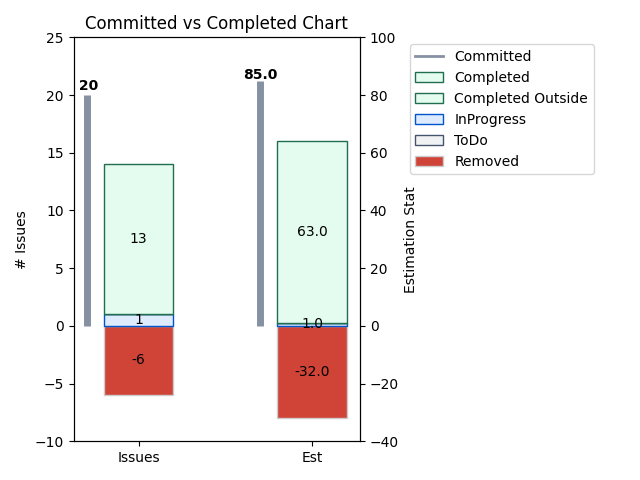

In [19]:
display(HTML(report.show_committed_vs_planned_chart()))


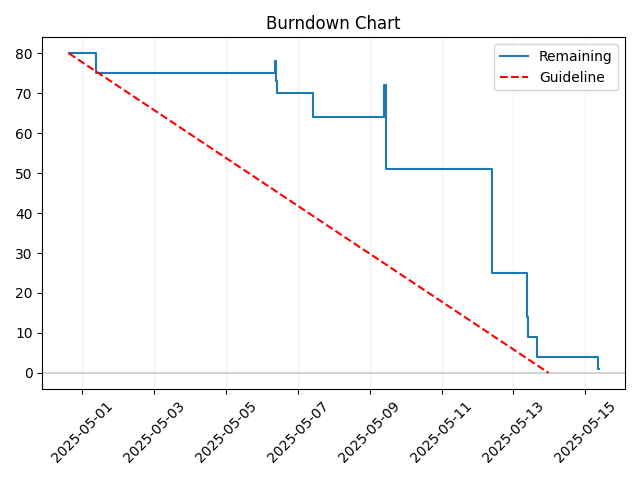

In [20]:
display(HTML(report.show_burndown_chart()))

In [21]:
display(HTML(report.show_committed_vs_planned()))

In [22]:
display(HTML(report.show_sprint_issue_types_statistics()))

,Completed,Not Completed,Removed
Story,13,1,6


In [23]:
display(HTML(report.show_predictability()))

Sprint,Estimated,Completed,Predictability Score,Stars
PI9 - Core - Sprint 0,0.0,1.0,-,-
PI8 Sprint 5 - Core,85.0,63.0,0.26,★★★★
PI8 Sprint 4 - Core,61.0,11.0,0.82,★
PI8 Sprint 3 - Core,61.0,30.0,0.51,★★★
PI8 Sprint 2 - Core,81.0,68.0,0.16,★★★★★
PI8 Sprint 1 - Core,71.0,68.0,0.04,★★★★★
PI8 Sprint 0 - Core,122.0,29.0,0.76,★★
PI7 Sprint 5 - Core,169.0,55.0,0.67,★★
PI7 Sprint 4 - Core,133.0,5.0,0.96,★
PI7 Sprint 3 - Core,110.0,36.0,0.67,★★


In [24]:
display(HTML(report.show_epic_statistics()))

Parent,Epic,Status,Completed Estimate %,Completed Count %
[FDSEWMSR-16046] T06-ISV-01 | Finance | Foundations,[FDSEWMSR-18240] T06-ISV-01 | Finance | Foundations | Approvals Localisation,In Progress,92.6,81.2
[FDSEWMSR-15590] T06-ISV-01 | Finance | Transactions and Notices,[FDSEWMSR-17750] Manage Notices,In Progress,77.5,73.3


In [25]:
if not zephyr_plugin is None:
  display(HTML(zephyr_plugin.show_report()))

In [26]:
display(HTML(report.show_burndown_table()))

,Timestamp,Date,Issue,Event Type,Event Detail,Inc.,Dec.,Remaining
0,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-11861,Sprint start,,5.0,,5.0
1,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-14416,Sprint start,,,,5.0
2,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-16706,Sprint start,,13.0,,18.0
3,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-16755,Sprint start,,8.0,,26.0
4,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-17037,Sprint start,,5.0,,31.0
5,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-17125,Sprint start,,8.0,,39.0
6,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-17795,Sprint start,,3.0,,42.0
7,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-17980,Sprint start,,,,42.0
8,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-18117,Sprint start,,3.0,,45.0
9,1746024906840,2025-04-30 14:55:06.839999914,FDSEWMSR-18227,Sprint start,,3.0,,48.0
